This notebook is based off the following reference
https://towardsdatascience.com/lstm-autoencoder-for-anomaly-detection-e1f4f2ee7ccf

**Download data**

In [2]:
!wget https://ti.arc.nasa.gov/m/project/prognostic-repository/IMS.7z

--2020-01-04 00:37:22--  https://ti.arc.nasa.gov/m/project/prognostic-repository/IMS.7z
Resolving ti.arc.nasa.gov (ti.arc.nasa.gov)... 128.102.105.66, 2001:4d0:6311:2227:14b6:372b:2078:2a94
Connecting to ti.arc.nasa.gov (ti.arc.nasa.gov)|128.102.105.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1075320408 (1.0G) [application/x-7z-compressed]
Saving to: ‘IMS.7z’

IMS.7z              100%[===================>]   1.00G  45.1MB/s    in 56s     

2020-01-04 00:38:56 (18.3 MB/s) - ‘IMS.7z’ saved [1075320408/1075320408]



In [5]:
!sudo apt update && sudo apt install --assume-yes p7zip

Get:1 file:/var/nccl-repo-2.2.13-ga-cuda9.2  InRelease
Ign:1 file:/var/nccl-repo-2.2.13-ga-cuda9.2  InRelease
Get:2 file:/var/nccl-repo-2.2.13-ga-cuda9.2  Release [574 B]
Hit:3 http://azure.archive.ubuntu.com/ubuntu xenial InRelease
Get:2 file:/var/nccl-repo-2.2.13-ga-cuda9.2  Release [574 B]                   
Get:4 http://azure.archive.ubuntu.com/ubuntu xenial-updates InRelease [109 kB] 
Get:5 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]33m
Get:6 http://azure.archive.ubuntu.com/ubuntu xenial-backports InRelease [107 kB]
Ign:7 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Hit:8 http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release
Hit:9 https://packages.microsoft.com/repos/azure-cli xenial InRelease          
Hit:10 https://packages.microsoft.com/ubuntu/16.04/prod xenial InRelease
Hit:11 https://cloud.r-project.org/bin/linux/ubuntu xenial-cran35/ InRelease
Get:12 http://security.ubun

In [6]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [7]:
!cd data && p7zip -d ../IMS.7z 


7-Zip (A) [64] 9.20  Copyright (c) 1999-2010 Igor Pavlov  2010-11-18
p7zip Version 9.20 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,4 CPUs)

Processing archive: ../IMS.7z

Extracting  1st_test.rar
Extracting  2nd_test.rar
Extracting  3rd_test.rar
Extracting  Readme Document for IMS Bearing Data.pdf

Everything is Ok

Files: 4
Size:       1061595979
Compressed: 1075320408


In [8]:
!sudo apt install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  grub-pc-bin
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 60 not upgraded.
Need to get 123 kB of archives.
After this operation, 310 kB of additional disk space will be used.
Get:1 http://azure.archive.ubuntu.com/ubuntu xenial-updates/multiverse amd64 unrar amd64 1:5.3.2-1+deb9u1build0.16.04.1 [123 kB]
Fetched 123 kB in 0s (760 kB/s)

78Selecting previously unselected package unrar.
(Reading database ... 169967 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.3.2-1+deb9u1build0.16.04.1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 16%] [##########................................................] 8Unpacking unrar (1:5.3.2-1+d

In [17]:
!cd data && mkdir uncompressed && unrar e 1st_test.rar uncompressed


UNRAR 5.30 beta 2 freeware      Copyright (c) 1993-2015 Alexander Roshal


Extracting from 1st_test.rar

Extracting  uncompressed/2003.10.22.12.06.24                             0  OK 
Extracting  uncompressed/2003.10.22.12.09.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.14.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.19.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.24.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.29.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.34.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.39.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.44.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.49.13                             0  OK 
Extracting  uncompressed/2003.10.22.12.54.13                             0  OK 
Extracting  un

Extracting  uncompressed/2003.10.29.22.19.46                             9  OK 
Extracting  uncompressed/2003.10.29.22.29.46                             9  OK 
Extracting  uncompressed/2003.10.29.22.39.46                             9  OK 
Extracting  uncompressed/2003.10.29.22.49.46                             9  OK 
Extracting  uncompressed/2003.10.29.22.59.46                             9  OK 
Extracting  uncompressed/2003.10.29.23.09.46                             9  OK 
Extracting  uncompressed/2003.10.29.23.19.46                             9  OK 
Extracting  uncompressed/2003.10.29.23.29.46                             9  OK 
Extracting  uncompressed/2003.10.29.23.39.46                             9  OK 
Extracting  uncompressed/2003.10.29.23.49.46                             9  OK 
Extracting  uncompressed/2003.10.29.23.59.46                             9  OK 
Extracting  uncompressed/2003.10.30.00.09.46                             9  OK 
Extracting  uncompressed/2003.10.30.00.1

Extracting  uncompressed/2003.11.01.06.21.44                            18  OK 
Extracting  uncompressed/2003.11.01.06.31.44                            18  OK 
Extracting  uncompressed/2003.11.01.06.41.44                            18  OK 
Extracting  uncompressed/2003.11.01.06.51.44                            18  OK 
Extracting  uncompressed/2003.11.01.07.01.44                            18  OK 
Extracting  uncompressed/2003.11.01.07.11.44                            18  OK 
Extracting  uncompressed/2003.11.01.07.21.44                            18  OK 
Extracting  uncompressed/2003.11.01.07.31.44                            18  OK 
Extracting  uncompressed/2003.11.01.07.41.44                            18  OK 
Extracting  uncompressed/2003.11.01.07.51.44                            18  OK 
Extracting  uncompressed/2003.11.01.08.01.44                            18  OK 
Extracting  uncompressed/2003.11.01.08.11.44                            1 19  OK 
Extracting  uncompressed/2003.11.01.08

Extracting  uncompressed/2003.11.08.14.01.44                            27  OK 
Extracting  uncompressed/2003.11.08.14.11.44                            27  OK 
Extracting  uncompressed/2003.11.08.14.21.44                            27  OK 
Extracting  uncompressed/2003.11.08.14.31.44                            28  OK 
Extracting  uncompressed/2003.11.08.14.41.44                            28  OK 
Extracting  uncompressed/2003.11.08.14.51.44                            28  OK 
Extracting  uncompressed/2003.11.08.15.01.44                            28  OK 
Extracting  uncompressed/2003.11.08.15.11.44                            28  OK 
Extracting  uncompressed/2003.11.08.15.21.44                            28  OK 
Extracting  uncompressed/2003.11.08.15.31.44                            28  OK 
Extracting  uncompressed/2003.11.08.15.41.44                            28  OK 
Extracting  uncompressed/2003.11.08.15.51.44                            28  OK 
Extracting  uncompressed/2003.11.08.16.0

Extracting  uncompressed/2003.11.10.03.25.58                            37  OK 
Extracting  uncompressed/2003.11.10.03.35.58                            37  OK 
Extracting  uncompressed/2003.11.10.03.45.58                            37  OK 
Extracting  uncompressed/2003.11.10.03.55.58                            37  OK 
Extracting  uncompressed/2003.11.10.04.05.58                            37  OK 
Extracting  uncompressed/2003.11.10.04.15.58                            37  OK 
Extracting  uncompressed/2003.11.10.04.25.58                            37  OK 
Extracting  uncompressed/2003.11.10.04.35.58                            37  OK 
Extracting  uncompressed/2003.11.10.04.45.58                            37  OK 
Extracting  uncompressed/2003.11.10.04.55.58                            37  OK 
Extracting  uncompressed/2003.11.10.05.05.58                            37  OK 
Extracting  uncompressed/2003.11.10.05.15.58                            37  OK 
Extracting  uncompressed/2003.11.10.05.2

Extracting  uncompressed/2003.11.15.08.18.46                            46  OK 
Extracting  uncompressed/2003.11.15.08.28.46                            46  OK 
Extracting  uncompressed/2003.11.15.08.38.46                            46  OK 
Extracting  uncompressed/2003.11.15.08.48.46                            46  OK 
Extracting  uncompressed/2003.11.15.08.58.46                            46  OK 
Extracting  uncompressed/2003.11.15.09.08.46                            46  OK 
Extracting  uncompressed/2003.11.15.09.18.46                            46  OK 
Extracting  uncompressed/2003.11.15.09.28.46                            46  OK 
Extracting  uncompressed/2003.11.15.09.38.46                            4 47  OK 
Extracting  uncompressed/2003.11.15.09.48.46                            47  OK 
Extracting  uncompressed/2003.11.15.09.58.46                            47  OK 
Extracting  uncompressed/2003.11.15.10.08.46                            47  OK 
Extracting  uncompressed/2003.11.15.10

Extracting  uncompressed/2003.11.16.18.18.46                            5 56  OK 
Extracting  uncompressed/2003.11.16.18.28.46                            56  OK 
Extracting  uncompressed/2003.11.16.18.38.46                            56  OK 
Extracting  uncompressed/2003.11.16.18.48.46                            56  OK 
Extracting  uncompressed/2003.11.16.18.58.46                            56  OK 
Extracting  uncompressed/2003.11.16.19.08.46                            56  OK 
Extracting  uncompressed/2003.11.16.19.18.46                            56  OK 
Extracting  uncompressed/2003.11.16.19.28.46                            56  OK 
Extracting  uncompressed/2003.11.16.19.38.46                            56  OK 
Extracting  uncompressed/2003.11.16.19.48.46                            56  OK 
Extracting  uncompressed/2003.11.16.19.58.46                            56  OK 
Extracting  uncompressed/2003.11.16.20.08.46                            56  OK 
Extracting  uncompressed/2003.11.16.20

Extracting  uncompressed/2003.11.18.17.52.30                            65  OK 
Extracting  uncompressed/2003.11.18.18.02.30                            65  OK 
Extracting  uncompressed/2003.11.18.18.12.30                            65  OK 
Extracting  uncompressed/2003.11.18.18.22.30                            65  OK 
Extracting  uncompressed/2003.11.18.18.32.30                            65  OK 
Extracting  uncompressed/2003.11.18.18.42.30                            65  OK 
Extracting  uncompressed/2003.11.18.18.52.30                            65  OK 
Extracting  uncompressed/2003.11.18.19.02.30                            65  OK 
Extracting  uncompressed/2003.11.18.19.12.30                            65  OK 
Extracting  uncompressed/2003.11.19.09.06.09                            65  OK 
Extracting  uncompressed/2003.11.19.09.12.30                            65  OK 
Extracting  uncompressed/2003.11.19.09.22.30                            65  OK 
Extracting  uncompressed/2003.11.19.11.0

Extracting  uncompressed/2003.11.21.02.14.03                            74  OK 
Extracting  uncompressed/2003.11.21.02.24.03                            74  OK 
Extracting  uncompressed/2003.11.21.02.34.03                            74  OK 
Extracting  uncompressed/2003.11.21.02.44.03                            7 75  OK 
Extracting  uncompressed/2003.11.21.02.54.03                            75  OK 
Extracting  uncompressed/2003.11.21.03.04.03                            75  OK 
Extracting  uncompressed/2003.11.21.03.14.03                            75  OK 
Extracting  uncompressed/2003.11.21.03.24.03                            75  OK 
Extracting  uncompressed/2003.11.21.03.34.03                            75  OK 
Extracting  uncompressed/2003.11.21.03.44.03                            75  OK 
Extracting  uncompressed/2003.11.21.03.54.03                            75  OK 
Extracting  uncompressed/2003.11.21.04.04.03                            75  OK 
Extracting  uncompressed/2003.11.21.04

Extracting  uncompressed/2003.11.22.16.46.56                            84  OK 
Extracting  uncompressed/2003.11.22.16.56.56                            84  OK 
Extracting  uncompressed/2003.11.22.17.06.56                            84  OK 
Extracting  uncompressed/2003.11.22.17.16.56                            84  OK 
Extracting  uncompressed/2003.11.22.17.26.56                            84  OK 
Extracting  uncompressed/2003.11.22.17.36.56                            84  OK 
Extracting  uncompressed/2003.11.22.17.46.56                            84  OK 
Extracting  uncompressed/2003.11.22.17.56.56                            84  OK 
Extracting  uncompressed/2003.11.22.18.06.56                            84  OK 
Extracting  uncompressed/2003.11.22.18.16.56                            84  OK 
Extracting  uncompressed/2003.11.22.18.26.56                            8 85  OK 
Extracting  uncompressed/2003.11.22.18.36.56                            85  OK 
Extracting  uncompressed/2003.11.22.18

Extracting  uncompressed/2003.11.24.08.21.24                            94  OK 
Extracting  uncompressed/2003.11.24.08.31.24                            94  OK 
Extracting  uncompressed/2003.11.24.08.41.24                            94  OK 
Extracting  uncompressed/2003.11.24.08.51.24                            94  OK 
Extracting  uncompressed/2003.11.24.09.01.24                            94  OK 
Extracting  uncompressed/2003.11.24.09.11.24                            94  OK 
Extracting  uncompressed/2003.11.24.09.21.24                            94  OK 
Extracting  uncompressed/2003.11.24.10.02.30                            94  OK 
Extracting  uncompressed/2003.11.24.10.11.24                            94  OK 
Extracting  uncompressed/2003.11.24.10.21.24                            94  OK 
Extracting  uncompressed/2003.11.24.10.31.24                            94  OK 
Extracting  uncompressed/2003.11.24.10.41.24                            94  OK 
Extracting  uncompressed/2003.11.24.10.5

**Each file contains readings for an interval of 10 seconds containing 20,480 points in each file. Mechanical degradation occurs gradually over time, so we just need the average for each period of 10 seconds.**

In [29]:
# import libraries
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.externals import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
#from tensorflow import set_seed
import tensorflow as tf


from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers

In [30]:
# set random seed
seed(10)
tf.random.set_seed(10)

In [31]:
# load, average and merge sensor samples
data_dir = 'data/uncompressed'
merged_data = pd.DataFrame()

for filename in os.listdir(data_dir):
    dataset = pd.read_csv(os.path.join(data_dir, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1,8))
    dataset_mean_abs.index = [filename]
    dataset_mean_abs.drop(dataset_mean_abs.columns[[-1, -2, -3, -4]], axis = 1, inplace = True) 
    merged_data = merged_data.append(dataset_mean_abs)
    
merged_data.columns = ['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']

In [33]:
# transform data file index to datetime and sort in chronological order
merged_data.index = pd.to_datetime(merged_data.index, format='%Y.%m.%d.%H.%M.%S')
merged_data = merged_data.sort_index()
merged_data.to_csv('Averaged_BearingTest_Dataset.csv')
print("Dataset shape:", merged_data.shape)
merged_data.head()

Dataset shape: (2156, 4)


,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2003-10-22 12:06:24,0.104148,0.100253,0.107147,0.102004
2003-10-22 12:09:13,0.103651,0.099854,0.108189,0.102920
2003-10-22 12:14:13,0.105039,0.101543,0.108543,0.104042
2003-10-22 12:19:13,0.104900,0.101573,0.108152,0.103378
2003-10-22 12:24:13,0.104779,0.102181,0.107943,0.102629


**Train on good data, test on bad data using autoencorder method**

In [34]:
train = merged_data['2003-10-22 12:09:13': '2003-11-24 01:01:24']
test = merged_data['2003-11-24 01:01:24':]
print("Training dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Training dataset shape: (1999, 4)
Test dataset shape: (157, 4)


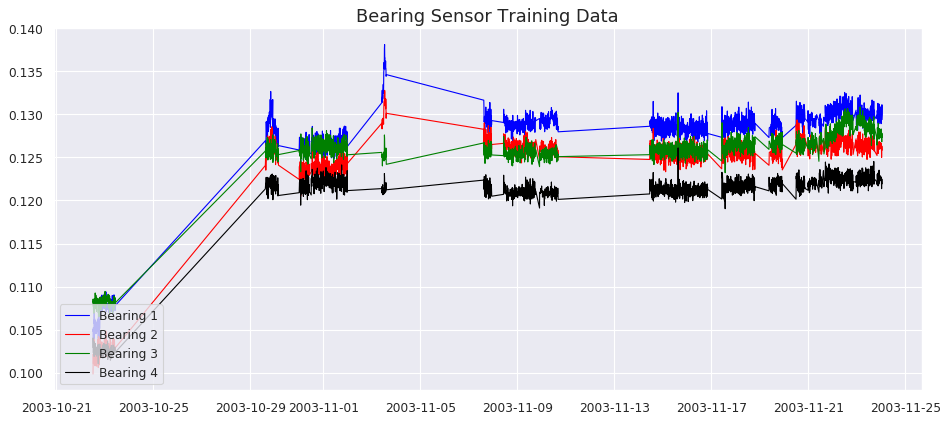

In [35]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(train['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(train['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Data', fontsize=16)
plt.show()

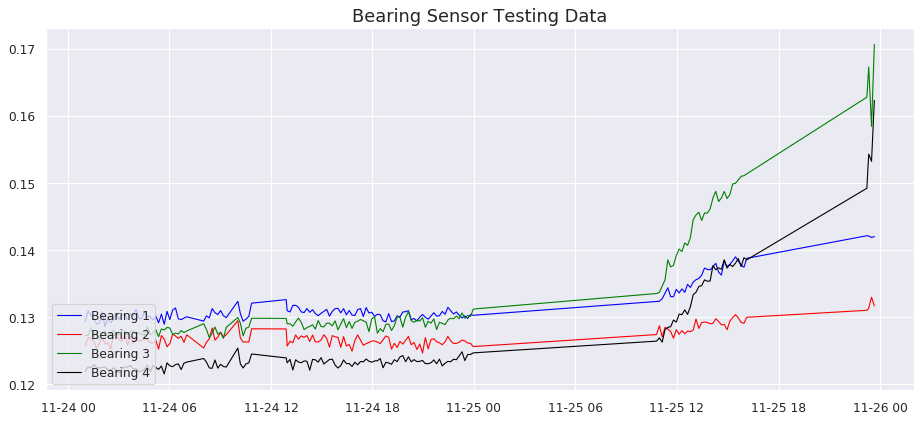

In [36]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Testing Data', fontsize=16)
plt.show()

In [37]:
# transforming data from the time domain to the frequency domain using fast Fourier transform
train_fft = np.fft.fft(train)
test_fft = np.fft.fft(test)

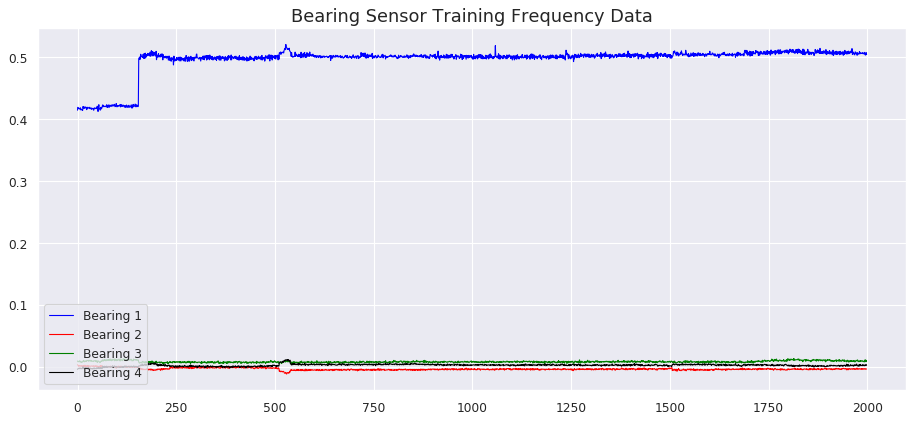

In [38]:
# frequencies of the healthy sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(train_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(train_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(train_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(train_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Training Frequency Data', fontsize=16)
plt.show()

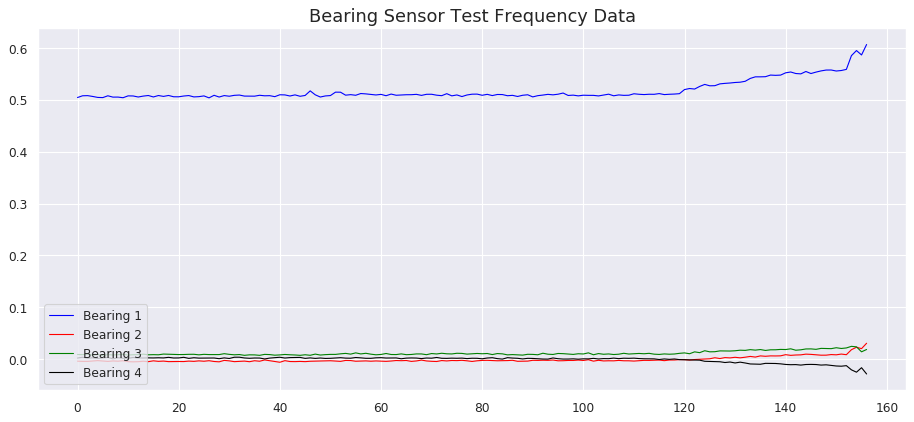

In [39]:
# frequencies of the degrading sensor signal
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test_fft[:,0].real, label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test_fft[:,1].imag, label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test_fft[:,2].real, label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test_fft[:,3].real, label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Test Frequency Data', fontsize=16)
plt.show()

In [40]:
# normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [41]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (1999, 1, 4)
Test data shape: (157, 1, 4)


**Train model**

In [42]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [43]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 4)]            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
lstm_5 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 4)              0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 4)              68  

In [44]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05).history

Train on 1899 samples, validate on 100 samples
Epoch 1/100
1899/1899 [==============================] - 7s 4ms/sample - loss: 0.5405 - val_loss: 0.1068
Epoch 2/100
1899/1899 [==============================] - 1s 509us/sample - loss: 0.0499 - val_loss: 0.0221
Epoch 3/100
1899/1899 [==============================] - 1s 497us/sample - loss: 0.0403 - val_loss: 0.0241
Epoch 4/100
1899/1899 [==============================] - 1s 509us/sample - loss: 0.0361 - val_loss: 0.0232
Epoch 5/100
1899/1899 [==============================] - 1s 517us/sample - loss: 0.0318 - val_loss: 0.0224
Epoch 6/100
1899/1899 [==============================] - 1s 506us/sample - loss: 0.0282 - val_loss: 0.0255
Epoch 7/100
1899/1899 [==============================] - 1s 504us/sample - loss: 0.0250 - val_loss: 0.0269
Epoch 8/100
1899/1899 [==============================] - 1s 527us/sample - loss: 0.0234 - val_loss: 0.0261
Epoch 9/100
1899/1899 [==============================] - 1s 520us/sample - loss: 0.0227 - val_loss:

1899/1899 [==============================] - 1s 511us/sample - loss: 0.0207 - val_loss: 0.0214
Epoch 77/100
1899/1899 [==============================] - 1s 505us/sample - loss: 0.0208 - val_loss: 0.0188
Epoch 78/100
1899/1899 [==============================] - 1s 509us/sample - loss: 0.0208 - val_loss: 0.0212
Epoch 79/100
1899/1899 [==============================] - 1s 503us/sample - loss: 0.0208 - val_loss: 0.0203
Epoch 80/100
1899/1899 [==============================] - 1s 515us/sample - loss: 0.0207 - val_loss: 0.0211
Epoch 81/100
1899/1899 [==============================] - 1s 495us/sample - loss: 0.0209 - val_loss: 0.0218
Epoch 82/100
1899/1899 [==============================] - 1s 493us/sample - loss: 0.0207 - val_loss: 0.0205
Epoch 83/100
1899/1899 [==============================] - 1s 498us/sample - loss: 0.0207 - val_loss: 0.0208
Epoch 84/100
1899/1899 [==============================] - 1s 488us/sample - loss: 0.0207 - val_loss: 0.0244
Epoch 85/100
1899/1899 [=================

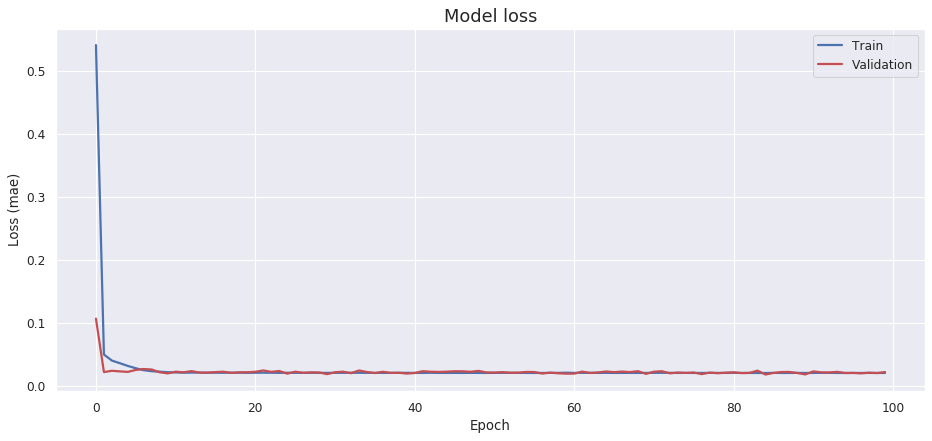

In [45]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

**Plot loss distribution to determine suitable threshold for detecting anomaly (and so we don't classify noise as anomaly instead)**

(0.0, 0.2)

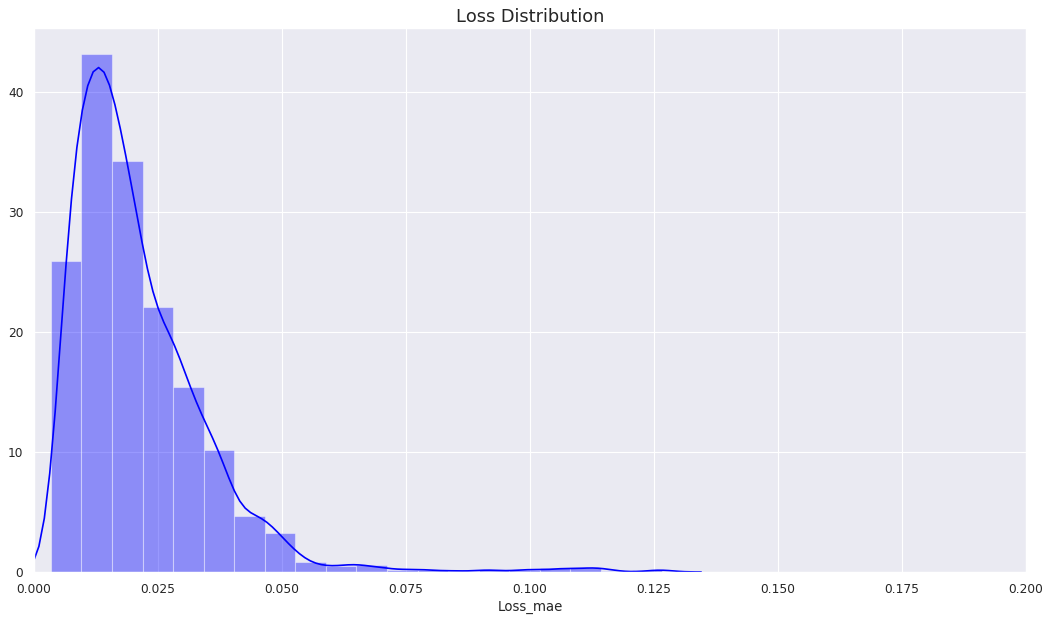

In [46]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.2])

**Try anomaly threshold of 0.15**

In [49]:
# calculate the loss on the test set
X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)
Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = 0.15
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head(157)

,Loss_mae,Threshold,Anomaly
2003-11-24 01:01:24,0.013889,0.15,False
2003-11-24 01:11:24,0.013093,0.15,False
2003-11-24 01:21:24,0.019674,0.15,False
2003-11-24 01:31:24,0.010741,0.15,False
2003-11-24 01:41:24,0.024294,0.15,False
2003-11-24 01:51:24,0.010568,0.15,False
2003-11-24 02:01:24,0.010965,0.15,False
2003-11-24 02:11:24,0.024695,0.15,False
2003-11-24 02:21:24,0.007549,0.15,False
2003-11-24 02:31:24,0.018922,0.15,False


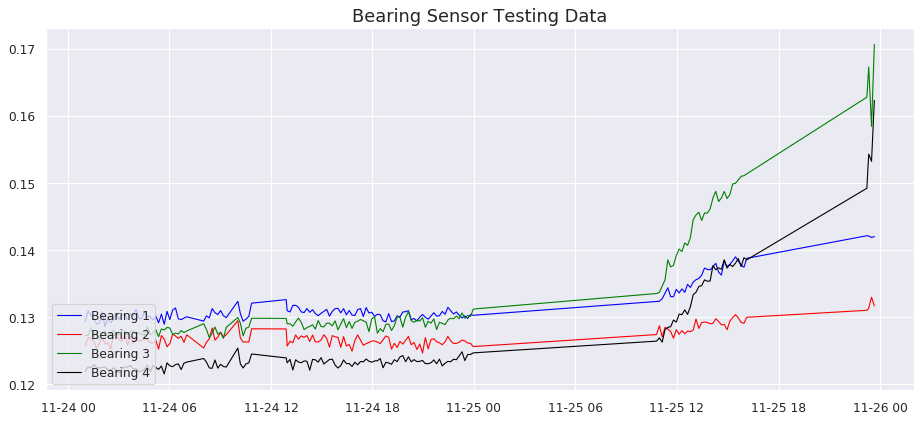

In [50]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(test['Bearing 1'], label='Bearing 1', color='blue', animated = True, linewidth=1)
ax.plot(test['Bearing 2'], label='Bearing 2', color='red', animated = True, linewidth=1)
ax.plot(test['Bearing 3'], label='Bearing 3', color='green', animated = True, linewidth=1)
ax.plot(test['Bearing 4'], label='Bearing 4', color='black', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('Bearing Sensor Testing Data', fontsize=16)
plt.show()

In [51]:
# calculate the same metrics for the training set 
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = 0.15
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

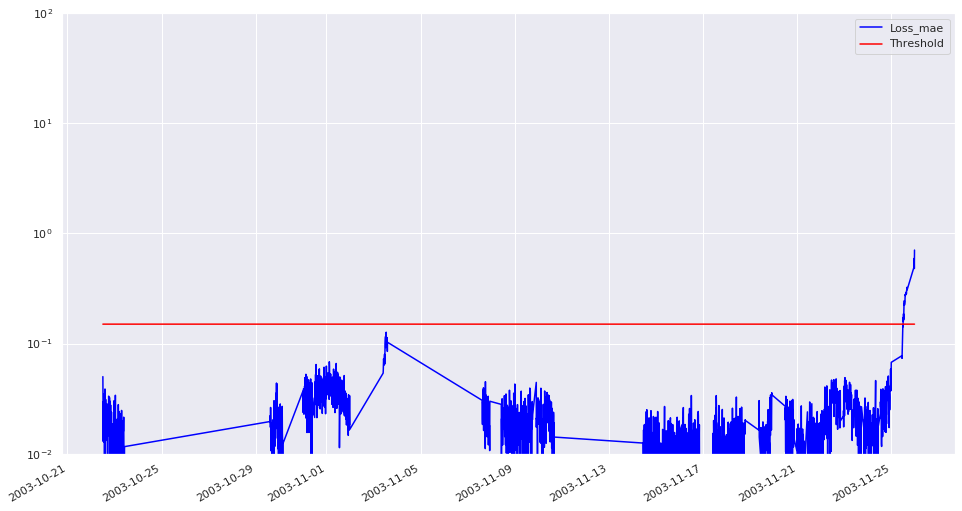

In [52]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-2,1e2], color=['blue','red'])

In [26]:
# save all model information, including weights, in h5 format
model.save("Cloud_model.h5")
print("Model saved")


Model saved
